## Non Linear Regression Analysis

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#import and read data
import sys
#sys.path[0] # current directory
filepath = sys.path[0] + '/china_gdp.csv'
df=pd.read_csv(filepath)
# take a look at the dataset
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


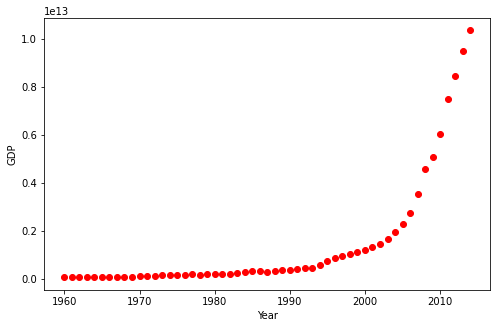

In [24]:
#Plotting data
# taking data for x,y axis
x_data = df['Year'].to_numpy()
y_data = df['Value'].to_numpy()
plt.figure(figsize=(8,5))
plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [25]:
#Building the model
def signmoid(x, beta1, beta2):
    y = 1 / (1 + np.exp(-beta1*(x - beta2)))
    return y

In [26]:
# normalize the data
# using Simple Feature Scaling method
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [27]:
# find the best parameters for the fit line
# using curve_fit (from scipy.optimize)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(signmoid, xdata, ydata)
#print out the final parameters
print('beta1 = %f, beta2 = %f' %(popt[0],popt[1]))

beta1 = 690.451711, beta2 = 0.997207


In [28]:
x = np.linspace(1960,2015, 55)
x = x/max(x)
y = signmoid(x,popt[0],popt[1])
# y = signmoid(x, *popt)

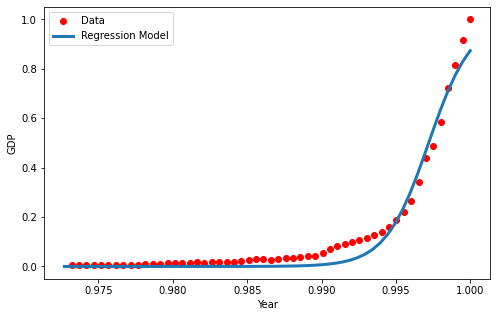

In [29]:
#plot the result of regression model
plt.figure(figsize=(8,5))
# plot the data of China GDP from dataset
plt.plot(xdata,ydata, 'ro', label='Data')
# plot from model
plt.plot(x,y, linewidth = 3.0, label = 'Regression Model')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [30]:
# Evaluation the model
# Create train/test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (xdata, ydata, test_size=0.2, random_state=0)
# build the model using train set
popt1, pcov1 = curve_fit(signmoid, x_train, y_train)
#obtain a prediction with test set
yhat = signmoid(x_test,popt1[0],popt1[1])
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(yhat , y_test) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.90
